In [4]:
import pandas as pd
movies = pd.read_pickle("D:/University/Edinburgh/Dissertation/data/data.pkl")
user_df =pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/users.dat",sep="::",header=None)
user_df.rename(columns={0: "userId", 1: "gender", 2: "age", 3: "occupation", 4: "postcode"}, inplace=True)
# ratings_df = pd.read_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_updated.pkl")

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1]:
import pandas as pd
ratings_df =pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/ratings.dat",sep="::",header=None)

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [11]:
ratings_df
ratings_df.rename(columns={0: "userId", 1: "movieId", 2: "rating", 3: "timestamp"}, inplace=True)
ratings_df.to_pickle("D:/University/Edinburgh/Dissertation/data/ratings_1m.pkl")

In [2]:
len(ratings_df)

1000209

In [2]:
# user_df =pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/users.dat",sep="::",header=None)
# ratings_df1 = pd.read_csv("D:/University/Edinburgh/Dissertation/data/movielens/ratings.dat",sep="::",header=None)
# ratings_df1.rename(columns={0: "userId", 1: "movieId", 2: "rating", 3: "timestamp"}, inplace=True)
ratings_df = pd.read_csv("D:/University/Edinburgh/Dissertation/Data/ml-20m/ratings.csv")
# ratings_df3 = pd.read_csv("D:/University/Edinburgh/Dissertation/Data/ratings.csv")

# ratings_df = pd.concat([ratings_df1, ratings_df2, ratings_df3], ignore_index=True) 

ratings_df.drop_duplicates(inplace=True)

In [8]:
movies_ratings = set(ratings_df.movieId)
print("Number of unique movies in the ratings df after the movie removal", len(movies_ratings))
movies_ratings_df = list(movies_ratings & set(movies.movieId))
print("The size of union between the movie df (includes movies metadata) and the ratings_df:", len(movies_ratings_df))

#keep only the ratings that the user id has side information 
ratings_movie_df = ratings_df.loc[ratings_df["movieId"].isin(movies_ratings_df)]

print("The total number of ratings after removing movies that we don't have poster and user that we don't have side information:", len(ratings_movie_df))

Number of unique movies in the ratings df after the movie removal 3706
The size of union between the movie df (includes movies metadata) and the ratings_df: 3356
The total number of ratings after removing movies that we don't have poster and user that we don't have side information: 883313


In [9]:
user_ratings = set(ratings_movie_df.userId)
print("Number of unique user in the ratings df after the movie removal", len(user_ratings))
user_ratings_df = list(user_ratings & set(user_df.userId))
print("The size of union between the user df (includes user side information) and the ratings_df:", len(user_ratings_df))

# keep only the ratings that the user id has side information 
ratings_user_df = ratings_movie_df.loc[ratings_movie_df["userId"].isin(user_ratings_df)]

print("The total number of ratings after removing movies that we don't have poster and user that we don't have side information:", len(ratings_user_df))

Number of unique user in the ratings df after the movie removal 6040
The size of union between the user df (includes user side information) and the ratings_df: 6040
The total number of ratings after removing movies that we don't have poster and user that we don't have side information: 883313


In [5]:
ratings_user_df.sort_values(by="timestamp", inplace=True)

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
ratings_user_df.head()

,userId,movieId,rating,timestamp
729429,4864,17,5.0,825499934
729444,4864,79,1.0,825499934
729426,4864,10,3.0,825499934
729427,4864,11,5.0,825499934
729443,4864,62,4.0,825499935


In [ ]:
# ratings_user_df.to_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_movielens20m.pkl")

In [6]:
movie_distribution = ratings_user_df.groupby(['movieId'])['movieId'].count().reset_index(name='counts')
movie_less_10 = movie_distribution.loc[movie_distribution["counts"] <10]

In [7]:
movie_less_10

,movieId,counts
31,33,3
35,37,9
49,56,2
52,59,4
60,67,9
...,...,...
7505,91286,1
7506,93328,1
7507,100946,1
7508,102747,1


# Drop all the movies with less than 10 ratings

In [ ]:
ratings_movie_less_10_df= ratings_user_df.loc[~ratings_user_df["movieId"].isin(movie_less_10.movieId)]

# Adding the timestamp of for each one of the movies

In [8]:
test = [ratings_user_df["timestamp"].loc[ratings_user_df["movieId"] == movie_id] for movie_id in movie_less_10.movieId]

In [9]:
timestamps_movie_less_10 = []
for t in test:
    timestamps_movie_less_10.append(t.iloc[0] + 1)

movie_less_10["timestamp"] = timestamps_movie_less_10
movie_less_10.head()

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,movieId,counts,timestamp
31,33,3,836266184
35,37,9,836266162
49,56,2,836266162
52,59,4,836266162
60,67,9,836266184


Artificially add more ratings

In [10]:
import random
test_adding = []
total_number_of_added_ratings = 0
for movie_id, counts, temp_timestamp in zip(movie_less_10.movieId, movie_less_10.counts, movie_less_10.timestamp):
       
    while counts <= 15:
        total_number_of_added_ratings +=1 
        user = random.randint(1, 6040)
        #TODO: how to maka it 1.5, 3.5 etc
        rating = random.randint(1,5)
        # ratings_user_df = ratings_user_df.append({'userId': user, 'movieId': movie_id, 'rating': rating, 'timestamp': temp_timestamp}, ignore_index=True)
        test_adding.append([user, movie_id, rating, temp_timestamp])
        temp_timestamp +=1 
        counts+=1
         

In [11]:
extra_rating_df = pd.DataFrame(test_adding, columns=["userId", "movieId","rating","timestamp"])

In [12]:
len(extra_rating_df.userId.unique())

6026

In [14]:
extra_rating_df

,userId,movieId,rating,timestamp
0,4693,33,5,836266184
1,5797,33,5,836266185
2,1836,33,2,836266186
3,911,33,3,836266187
4,1056,33,5,836266188
...,...,...,...,...
36149,5848,107890,4,1395081944
36150,4888,107890,5,1395081945
36151,877,107890,5,1395081946
36152,5923,107890,4,1395081947


In [13]:
ratings_user_df = ratings_user_df.append(extra_rating_df, ignore_index=True)

In [15]:
ratings_user_df['rating'] = ratings_user_df['rating'].astype(int)

In [ ]:
# ratings_user_df.to_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_artficial_added.pkl")

In [20]:
ratings_user_df.loc[ratings_user_df.rating == 0]

,userId,movieId,rating,timestamp


In [18]:
ratings_user_df.loc[ratings_user_df['rating'] == 0, 'rating'] = 1

In [19]:
ratings_user_df.head()

,userId,movieId,rating,timestamp
0,4864,17,5,825499934
1,4864,79,1,825499934
2,4864,10,3,825499934
3,4864,11,5,825499934
4,4864,62,4,825499935


In [22]:
ratings_user_df.rating.unique()

array([5, 1, 3, 4, 2], dtype=int64)

In [23]:
len(ratings_user_df.userId.unique())

6040

In [24]:
len(ratings_user_df.movieId.unique())

7510

In [21]:
test_ratings = ratings_user_df

# OHE ratings

In [21]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(test_ratings['rating'])
# Drop column B as it is now encoded
test_ratings = test_ratings.drop('rating',axis = 1)
# Join the encoded df
test_ratings = test_ratings.join(one_hot)

NameError: name 'test_ratings' is not defined

In [24]:
test_ratings

,userId,movieId,timestamp,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,4864,17,825499934,0,0,0,0,0,0,0,0,0,1
1,4864,79,825499934,0,1,0,0,0,0,0,0,0,0
2,4864,10,825499934,0,0,0,0,0,1,0,0,0,0
3,4864,11,825499934,0,0,0,0,0,0,0,0,0,1
4,4864,62,825499935,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748461,5848,107890,1395081944,0,0,0,0,0,0,0,1,0,0
748462,4888,107890,1395081945,0,0,0,0,0,0,0,0,0,1
748463,877,107890,1395081946,0,0,0,0,0,0,0,0,0,1
748464,5923,107890,1395081947,0,0,0,0,0,0,0,1,0,0


In [25]:
ratings_user_df.to_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_artficial_added.pkl")

In [10]:
ratings_user_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [30]:
ratings_user_df.rating.unique()

array([5. , 1. , 3. , 4. , 2. , 4.5, 1.5, 3.5, 2.5, 0.5])

In [12]:
ratings = pd.read_pickle("D:/University/Edinburgh/Dissertation/data/ratings_1m.pkl")

In [13]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [14]:
ratings.rating.unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [15]:
import numpy as np
ratings['rating'] = ratings['rating'].apply(np.ceil)

[Text(0.5, 1.0, 'Number of ratings per category (1-5)')]

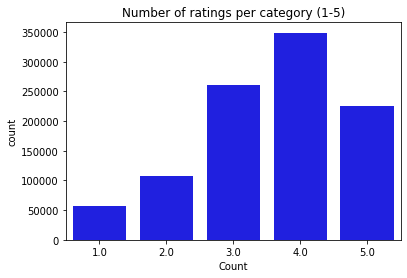

In [16]:
import seaborn as sns
plot_rating_count = sns.countplot(x='rating',data=ratings,color='blue')
plot_rating_count.set_xlabel("Ratings")
plot_rating_count.set_xlabel("Count")
plot_rating_count.set(title = "Number of ratings per category (1-5)")

In [35]:
ratings.to_pickle("D:/University/Edinburgh/Dissertation/Data/ratings_cls_1_5_2m.pkl")